# Final Portfolio Project: Machine Learning 

The chosen dataset, Red Wine Quality, was downloaded from Kaggle: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009. Also see P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

The project aims to create a model which can predict red wine quality based on the given input variables.

First of all, general relevant libraries will be imported:

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

Now, I will import the data and evaluate the columns, length, and some other relevant parameters.

In [3]:
wine = pd.read_csv('winequality-red.csv')

In [26]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,z_score_tsd,z_score_fa,z_score_rs,z_score_fsd,binned_qual
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.379133,-0.528360,-0.453218,-0.466193,not good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.624363,-0.298547,0.043416,0.872638,not good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.229047,-0.298547,-0.169427,-0.083669,not good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.411500,1.654856,-0.453218,0.107592,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.379133,-0.528360,-0.453218,-0.466193,not good
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,-0.196679,-0.528360,-0.524166,-0.274931,not good
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0.381091,-0.241094,-0.666062,-0.083669,not good
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,-0.774449,-0.585813,-0.949853,-0.083669,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,-0.865676,-0.298547,-0.382271,-0.657454,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1.688677,-0.470907,2.526589,0.107592,not good


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# there seem to be no NaN values
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

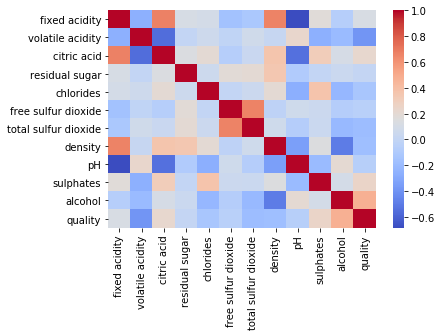

In [7]:
# certain inputs seem to have a higher impact on quality, e.g. volatile acidity, citric acid, sulphates, and alcohol.

import seaborn as sns

sns.heatmap(wine.corr(), cmap = 'coolwarm')
# some variables are more correlated with each other than others. This can make it harder for the model to predict the output correctly
# will try a version of the model in which I include only one input variable of those that are correlated more strongly: citric acid instead of fixed acidity, density instead of fixed acidity, total sulfur dioxide instead of free sulfur dioxide

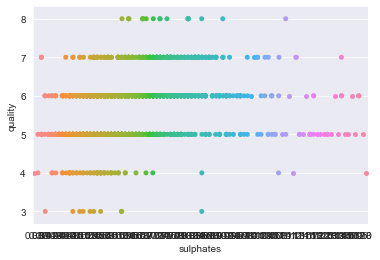

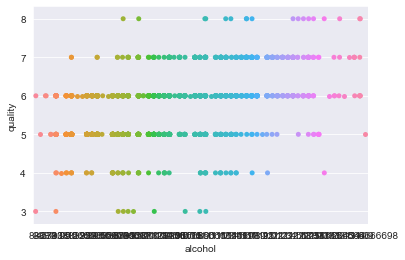

In [8]:
sns.set_style('darkgrid')

sns.stripplot(x = 'sulphates', y = 'quality', data = wine)
plt.show()

plt.clf()
sns.stripplot(x = 'alcohol', y = 'quality', data = wine)
plt.show()

In [9]:
# check data in regards to outliers: seems like there are columns that have outliers (max abs z-score is higher than 3)
# I will use z-score based standardization of data then to handle these better. In case the model does not perform well, I can come back and try to exclude the values in advance


from scipy import stats

wine['z_score_tsd']=stats.zscore(wine['total sulfur dioxide'])
wine['z_score_fa']=stats.zscore(wine['fixed acidity'])
wine['z_score_rs']=stats.zscore(wine['residual sugar'])
wine['z_score_fsd']=stats.zscore(wine['free sulfur dioxide'])

print(wine.z_score_tsd.abs().max())
print(wine.z_score_fa.abs().max())
print(wine.z_score_rs.abs().max())
print(wine.z_score_fsd.abs().max())

# exclude outliers based on income column and z-scores above an absolute value of 3 (which is an empirical rule)
# wine = wine.loc[wine['z_score_tsd'].abs()<=3]

7.375153940009771
4.355149169489777
9.19568145158918
5.367284317782079


After exploring and describing the data, I will now prepare the data. I will exclude three of the lower correlation inputs.

In [20]:
#wine.columns

X = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = wine['quality']

X_alt = wine[['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alt, y, random_state = 4)

In [21]:
# standardize data (vs normalize) as this handles outliers better

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler_alt = StandardScaler()
X_train_alt = scaler_alt.fit_transform(X_train_alt)
X_test_alt = scaler_alt.transform(X_test_alt)

## Training and testing the model

First, I will **train a linear regression model** based on the prepared data.

In [22]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_model.score(X_test, y_test)

0.3446624906892105

In [23]:
# alternative model with less correlated variables - gets a tiny bit better

lin_model_alt = LinearRegression()
lin_model_alt.fit(X_train_alt, y_train_alt)
lin_model_alt.score(X_test_alt, y_test_alt)

0.35761792557021965

I will try another model, **a classification model**, e.g. a decision tree. For that, I will convert the linear output variable into three arbitrary categories: not good (< 5), good (5 - 6), very good (7 - 8). 

In [33]:
# binning output variable

qual_bins = [0, 4, 6, 10]
bin_labels = ['not good', 'good', 'very good']

wine['binned_qual'] = pd.cut(wine['quality'], qual_bins, labels = bin_labels)

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,z_score_tsd,z_score_fa,z_score_rs,z_score_fsd,binned_qual
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.379133,-0.528360,-0.453218,-0.466193,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.624363,-0.298547,0.043416,0.872638,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.229047,-0.298547,-0.169427,-0.083669,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.411500,1.654856,-0.453218,0.107592,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.379133,-0.528360,-0.453218,-0.466193,good


In [37]:
X_new = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y_new = wine['binned_qual']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, random_state = 4)

scaler_new = StandardScaler()
X_train_new = scaler_new.fit_transform(X_train_new)
X_test_new = scaler_new.transform(X_test_new)

# test different possible models

# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_new, y_train_new)
print(log_model.score(X_test_new, y_test_new)) # returns accuracy of 0.8325



0.8325
0.85


In [40]:
# Support Vector Machine
from sklearn.svm import SVC

accuracies = {}

for i in list(np.arange(0.01,1.1,0.1)):
    svm_model = SVC(C = i)
    svm_model.fit(X_train_new, y_train_new)
    accuracies[i] = svm_model.score(X_test_new, y_test_new)

print(accuracies)

import operator

print(max(accuracies.items(), key=operator.itemgetter(1))[0]) # returns 0.91 - C of 0.91 is best and brings accuracy of 0.8525

{0.01: 0.83, 0.11: 0.83, 0.21000000000000002: 0.8325, 0.31000000000000005: 0.835, 0.41000000000000003: 0.8375, 0.51: 0.84, 0.6100000000000001: 0.8425, 0.7100000000000001: 0.845, 0.81: 0.8475, 0.91: 0.8525, 1.01: 0.85}
0.91


In [41]:
# Decision tree - should have a max depth of 3, and does perform equally well as SVM

from sklearn.tree import DecisionTreeClassifier

trees = {}

for i in list(range(1, 10)):
    tree_model = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree_model.fit(X_train_new, y_train_new)
    trees[i] = tree_model.score(X_test_new, y_test_new)

print(max(trees.items(), key=operator.itemgetter(1))[0])
print(trees[max(trees.items(), key=operator.itemgetter(1))[0]])

3
0.8525


In [45]:
# Random forest - performs even better than a decision tree and reaches 89 % accuracy with 35 trees.
from sklearn.ensemble import RandomForestClassifier

forest = {}

for i in list(range(1, 200)):
    forest_model = RandomForestClassifier(random_state = 1, n_estimators = i)
    forest_model.fit(X_train_new, y_train_new)
    forest[i] = forest_model.score(X_test_new, y_test_new)

print(max(forest.items(), key=operator.itemgetter(1))[0])
print(forest[max(forest.items(), key=operator.itemgetter(1))[0]])

#print(forest)

35
0.89
{1: 0.795, 2: 0.85, 3: 0.865, 4: 0.865, 5: 0.8475, 6: 0.865, 7: 0.8575, 8: 0.865, 9: 0.875, 10: 0.8725, 11: 0.8725, 12: 0.87, 13: 0.8775, 14: 0.8725, 15: 0.875, 16: 0.8775, 17: 0.88, 18: 0.8775, 19: 0.8725, 20: 0.875, 21: 0.875, 22: 0.88, 23: 0.8725, 24: 0.8775, 25: 0.88, 26: 0.885, 27: 0.8825, 28: 0.88, 29: 0.8825, 30: 0.8825, 31: 0.885, 32: 0.885, 33: 0.885, 34: 0.885, 35: 0.89, 36: 0.8875, 37: 0.89, 38: 0.89, 39: 0.8875, 40: 0.885, 41: 0.88, 42: 0.8775, 43: 0.8775, 44: 0.87, 45: 0.8725, 46: 0.875, 47: 0.8725, 48: 0.87, 49: 0.875, 50: 0.87, 51: 0.8725, 52: 0.875, 53: 0.8775, 54: 0.8775, 55: 0.88, 56: 0.88, 57: 0.8825, 58: 0.8825, 59: 0.8775, 60: 0.88, 61: 0.875, 62: 0.8725, 63: 0.875, 64: 0.875, 65: 0.8725, 66: 0.875, 67: 0.875, 68: 0.8775, 69: 0.875, 70: 0.875, 71: 0.875, 72: 0.8775, 73: 0.8775, 74: 0.88, 75: 0.88, 76: 0.88, 77: 0.88, 78: 0.88, 79: 0.88, 80: 0.885, 81: 0.88, 82: 0.8825, 83: 0.88, 84: 0.8775, 85: 0.8775, 86: 0.88, 87: 0.8775, 88: 0.88, 89: 0.88, 90: 0.88, 91:

By using a Decision Tree or a SVM, an accuracy of approx. 85 % can be reached to predict the previously defined quality categories. When using a Random Forest, even 89 % of accuracy can be reached, which is why I would recommend using a Random Forest for predicting wine quality when using this dataset.